In [73]:
# insert path containing extracted image and out.csv
dir_path = '/Users/tinmanee/Downloads/vid_72_extracted'
vid_no = 72

#path save output
out_path = '/Users/tinmanee/Downloads/out'

# type of movement
# 0 = squat
# 1 = deadlift
movement = 0

# score
score = 5

In [74]:
import os
import re
import pandas as pd
import cv2
import math
from matplotlib import pyplot as plt

In [75]:
photos = [filename for filename in os.listdir(dir_path) if filename.endswith('jpg')]
table = [filename for filename in os.listdir(dir_path) if filename.endswith('csv')]

In [76]:
df = pd.read_csv(dir_path+'/out.csv')
df['Type'] = movement
df['Position'] = 0
df['File'] = vid_no
df['score'] = score

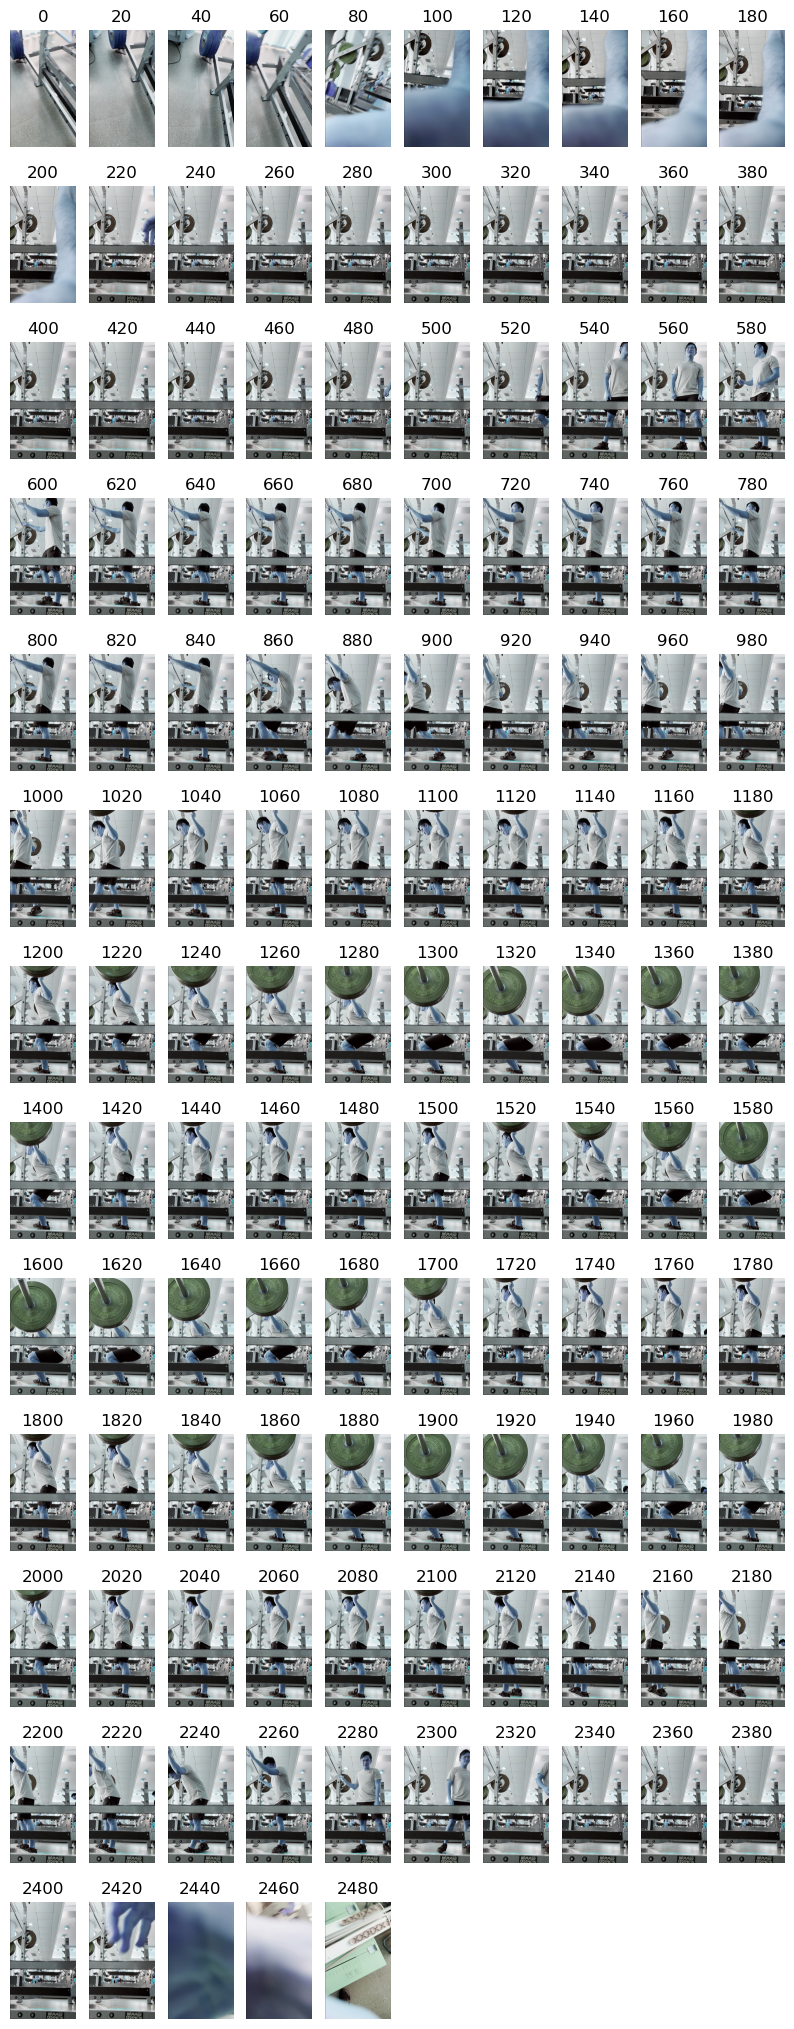

In [77]:
# frame rate
fs = 25
#column
columns = 10
# setting values to rows and column variables
rows = math.ceil(len(photos)//fs/columns)
# create figure
fig = plt.figure(figsize=(columns, 2*rows))


for i in range(len(photos)//fs):
    # reading images
    Image = cv2.imread(dir_path+"/vid_"+str(vid_no)+'frame'+str(i*fs)+'.jpg')
    
    # Adds a subplot at the i position
    fig.add_subplot(rows, columns, i+1)
    
    # showing image
    plt.imshow(Image)
    plt.axis('off')
    plt.title(str(i*fs))

In [80]:
# set postion
# 0 = up
# 1 = down

start = 1860
end = 1960
position = 1

df.loc[start:end, ("Position")] = position

my_column_changes = df["Position"].shift() != df["Position"]
my_column_changes = df[my_column_changes == True]
my_column_changes['Position'].head(50)

0       0
560     1
1240    2
1681    1
1860    2
1961    1
2301    0
Name: Position, dtype: int64

In [81]:
df.to_csv(out_path+'/'+str(vid_no)+'.csv')